# Part 2: Practical Application

# Data Cleaning and Preparation

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load dataset
data = pd.read_csv('dataset.csv')

In [3]:
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [4]:
# Display initial data
print("Initial Data:")
print(data.head())

Initial Data:
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [6]:
# Handling missing values
for column in data.columns:
    if data[column].dtype == 'object':  # Categorical column
        # Fill missing values with mode and assign back to the DataFrame
        data[column] = data[column].fillna(data[column].mode()[0])
    else:  # Numeric column
        # Fill missing values with median and assign back to the DataFrame
        data[column] = data[column].fillna(data[column].median())

In [8]:
# Handling inconsistencies
# Check if the 'Category' column exists
if 'Category' in data.columns:
    # Example: Standardizing categorical values
    data['Category'] = data['Category'].str.lower().str.strip()


In [9]:
# Check for duplicates and remove them
data = data.drop_duplicates()

In [10]:
# Display cleaned data
print("Cleaned Data:")
print(data.head())

Cleaned Data:
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [11]:
# Save cleaned data
data.to_csv('cleaned_dataset.csv', index=False)

# Part 3: Advanced Analytics

# Statistical Analysis

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [13]:
# Load dataset
data = pd.read_csv('dataset.csv')

In [14]:
# Perform correlation analysis
correlation_matrix = data.corr()

In [15]:
# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                   Channel    Region     Fresh      Milk   Grocery    Frozen  \
Channel           1.000000  0.062028 -0.169172  0.460720  0.608792 -0.202046   
Region            0.062028  1.000000  0.055287  0.032288  0.007696 -0.021044   
Fresh            -0.169172  0.055287  1.000000  0.100510 -0.011854  0.345881   
Milk              0.460720  0.032288  0.100510  1.000000  0.728335  0.123994   
Grocery           0.608792  0.007696 -0.011854  0.728335  1.000000 -0.040193   
Frozen           -0.202046 -0.021044  0.345881  0.123994 -0.040193  1.000000   
Detergents_Paper  0.636026 -0.001483 -0.101953  0.661816  0.924641 -0.131525   
Delicassen        0.056011  0.045212  0.244690  0.406368  0.205497  0.390947   

                  Detergents_Paper  Delicassen  
Channel                   0.636026    0.056011  
Region                   -0.001483    0.045212  
Fresh                    -0.101953    0.244690  
Milk                      0.661816    0.406368  
Grocery       

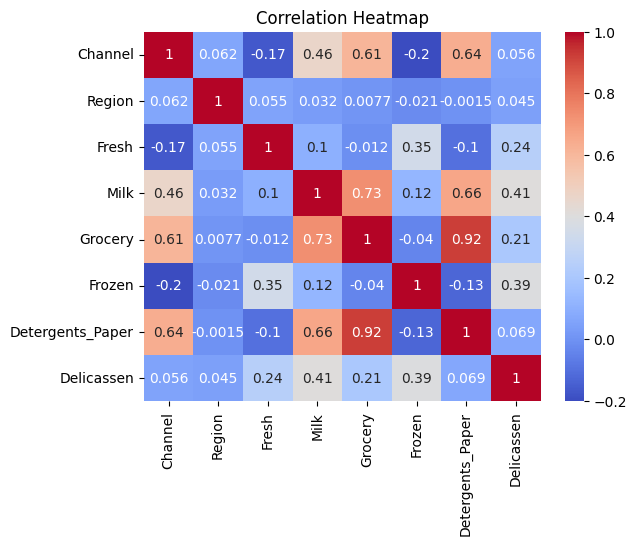

In [16]:
# Visualize correlations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [24]:

# Replace 'Column1' and 'Column2' with actual column names
if 'Sales' in data.columns and 'Profit' in data.columns:
    corr, _ = pearsonr(data['Sales'].dropna(), data['Profit'].dropna())
    print(f"Correlation between Sales and Profit: {corr:.2f}")
else:
    print("One or both columns are missing from the DataFrame.")

One or both columns are missing from the DataFrame.


# Predictive Analytics

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [27]:
# Load dataset
data = pd.read_csv('dataset.csv')

In [29]:
# Print column names to verify
print("Columns in the dataset:")
print(data.columns)

Columns in the dataset:
Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')


In [56]:
# Verify the presence of 'Date' and 'Sales' columns
if 'Date' in data.columns and 'Sales' in data.columns:
    # Data preprocessing
    data = data[['Date', 'Sales']]  # Simplify to relevant columns
    data['Date'] = pd.to_datetime(data['Date'])
    data = data.set_index('Date')
    data = data.asfreq('D')  # Assuming daily frequency, adjust as necessary
    data['Sales'] = data['Sales'].fillna(method='ffill')  # Forward fill missing values

In [60]:
 # Print DataFrame after preprocessing
print("Data after preprocessing:")
print(data.head())

Data after preprocessing:
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [61]:
print("Columns after preprocessing:")
print(data.columns)

Columns after preprocessing:
Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')


In [66]:
if 'Sales' in data.columns:
    X = data.index.values.reshape(-1, 1)  
    y = data['Sales'].values

In [71]:
try:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    print("Train-test split successful.")
    print(f"X_train shape: {X_train.shape}")
    print(f"y_train shape: {y_train.shape}")
except Exception as e:
    print(f"Error during train-test split: {e}")
    X_train, X_test, y_train, y_test = None, None, None, None

Error during train-test split: name 'y' is not defined


In [53]:
# Train-test split
try:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    print("Train-test split successful.")
except Exception as e:
    print(f"Error during train-test split: {e}")
    X_train, X_test, y_train, y_test = None, None, None, None

Error during train-test split: name 'y' is not defined


In [73]:
if X_train is not None and y_train is not None:
    # Build and train the model
    model = LinearRegression()
try:
    model.fit(X_train, y_train)
    print("Model training successful.")
except Exception as e:
    print(f"Error during model training: {e}")
    model = None

Error during model training: This LinearRegression estimator requires y to be passed, but the target y is None.


In [75]:
# Check if model is fitted
if model is not None:
    try:
        # Make predictions
        y_pred = model.predict(X_test)
        print("Model predictions successful.")
        
        # Evaluate the model
        mse = mean_squared_error(y_test, y_pred)
        print(f"Mean Squared Error: {mse:.2f}")

        # Plot results
        plt.figure(figsize=(10, 6))
        plt.plot(data.index, data['Sales'], label='Actual Sales')
        plt.plot(data.index[-len(y_test):], y_pred, label='Predicted Sales', linestyle='--')
        plt.xlabel('Date')
        plt.ylabel('Sales')
        plt.title('Sales Forecast')
        plt.legend()
        plt.show()

    except Exception as e:
        print(f"Error during prediction or evaluation: {e}")
else:
    print("Model was not trained. Skipping prediction and evaluation.")


Model was not trained. Skipping prediction and evaluation.
